## Creating BA networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# BA Parameters: (#nodes, avg_edge_per_node)
BA_info = [(1000,4),(1000,10), (1000,20),(2000,4),(2000,10),(2000,20),(3000,4),(3000,10),(3000,20)]

# Generate BA graphs
for x in BA_info:
    num_nodes, avg_degree = x[0], x[1]
    avg_edges = int(avg_degree/2)
    ba_graph = nx.barabasi_albert_graph(n=num_nodes, m=avg_edges)
    # Save as edge list
    nx.write_edgelist(ba_graph, f"./datasets/BA/ba_edgelist_{num_nodes}_{avg_degree}.edges", data=False)
# nx.draw(ba_graph, with_labels=False, node_color='lightblue', edge_color='gray', node_size=5, font_size=8)
# plt.show()


In [2]:
# EXPERIMENT 1: Different BA network size in [3k, 4k, 5k, 6k, 7k, 8k] with average node degree = 4
netsize=[3000, 4000, 5000, 6000, 7000, 8000]
for x in netsize:
    avg_edges = 2 # 4/2
    ba_graph = nx.barabasi_albert_graph(n=x, m=avg_edges)
    # Save as edge list
    nx.write_edgelist(ba_graph, f"./datasets/BA_EXP/ba_edgelist_exp1_{x}_{4}.edges", data=False)

# EXPERIMENT 2: Different BA average node degree in [4, 10, 20] with network size = 2k
avg_degree = [4, 10, 20]
for x in avg_degree:
    avg_edges = int(x/2)
    ba_graph = nx.barabasi_albert_graph(n=2000, m=avg_edges)
    # Save as edge list
    nx.write_edgelist(ba_graph, f"./datasets/BA_EXP/ba_edgelist_exp2_{2000}_{x}.edges", data=False)
    
# EXPERIMENT 3: Different BA average node degree in [2, 6, 10] with network size = 4k
avg_degree = [2, 6, 10]
for x in avg_degree:
    avg_edges = int(x/2)
    ba_graph = nx.barabasi_albert_graph(n=4000, m=avg_edges)
    # Save as edge list
    nx.write_edgelist(ba_graph, f"./datasets/BA_EXP/ba_edgelist_exp3_{4000}_{x}.edges", data=False)
    


## Load all network graphs and show info

In [3]:
import os
import networkx as nx
import pandas as pd

directory = "./datasets/"
graph_info = []
graph_list = []
for dirpath, _, files in os.walk(directory):
    for filename in files:
        try:
            if filename.endswith(".edges"):
                file_path = os.path.join(dirpath, filename) 
                graph_list.append(file_path)
                graph = nx.read_edgelist(file_path, comments="%", nodetype=int)
                # is_directed = isinstance(graph, nx.DiGraph)
                num_nodes = graph.number_of_nodes()
                num_edges = graph.number_of_edges()
                degrees = [deg for node, deg in graph.degree()]
                avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
                max_degree = max(degrees) if degrees else 0
                min_degree = min(degrees) if degrees else 0
                avg_clustering_coefficient = nx.average_clustering(graph) if num_nodes > 0 else 0
                num_unconnected_subgraphs = nx.number_connected_components(graph)
                largest_component = max(nx.connected_components(graph), key=len, default=set())
                subgraph_largest_component = graph.subgraph(largest_component)
                portion_nodes_largest_component = ((len(largest_component) / num_nodes)*100) if num_nodes > 0 else 0
                portion_edges_largest_component = ((subgraph_largest_component.number_of_edges())*100) / num_edges if num_edges > 0 else 0
                density = nx.density(graph) if num_nodes > 0 else 0

                graph_info.append({
                    "graph G": os.path.splitext(filename)[0],
                    # "Is Directed": is_directed,
                    "#Nodes n": num_nodes,
                    "#Edges e": num_edges,
                    "Avg Degree <e>": avg_degree,
                    "Max Degree e_max": max_degree,
                    "Min Degree e_min": min_degree,
                    "Avg Clustering Coefficient c": avg_clustering_coefficient,
                    "#subgraphs s": num_unconnected_subgraphs,
                    "Portion Nodes in Largest Component Gn%": portion_nodes_largest_component,
                    "Portion Edges in Largest Component Ge%": portion_edges_largest_component,
                    "Density d": density
                })
        except Exception as e: 
            print(e, f'{filename}')

df = pd.DataFrame(graph_info)
# print(df)
df.to_excel("graph_info.xlsx", index=False)


## SIR Simulation

In [4]:
print("# ",len(graph_list), " graphs:")
for graph in graph_list:
    print(graph)

#  43  graphs:
./datasets/BA\ba_edgelist_1000_10.edges
./datasets/BA\ba_edgelist_1000_20.edges
./datasets/BA\ba_edgelist_1000_4.edges
./datasets/BA\ba_edgelist_2000_10.edges
./datasets/BA\ba_edgelist_2000_20.edges
./datasets/BA\ba_edgelist_2000_4.edges
./datasets/BA\ba_edgelist_3000_10.edges
./datasets/BA\ba_edgelist_3000_20.edges
./datasets/BA\ba_edgelist_3000_4.edges
./datasets/BA_EXP\ba_edgelist_exp1_3000_4.edges
./datasets/BA_EXP\ba_edgelist_exp1_4000_4.edges
./datasets/BA_EXP\ba_edgelist_exp1_5000_4.edges
./datasets/BA_EXP\ba_edgelist_exp1_6000_4.edges
./datasets/BA_EXP\ba_edgelist_exp1_7000_4.edges
./datasets/BA_EXP\ba_edgelist_exp1_8000_4.edges
./datasets/BA_EXP\ba_edgelist_exp2_2000_10.edges
./datasets/BA_EXP\ba_edgelist_exp2_2000_20.edges
./datasets/BA_EXP\ba_edgelist_exp2_2000_4.edges
./datasets/BA_EXP\ba_edgelist_exp3_4000_10.edges
./datasets/BA_EXP\ba_edgelist_exp3_4000_2.edges
./datasets/BA_EXP\ba_edgelist_exp3_4000_6.edges
./datasets/other\arenas-pgp.edges
./datasets/othe

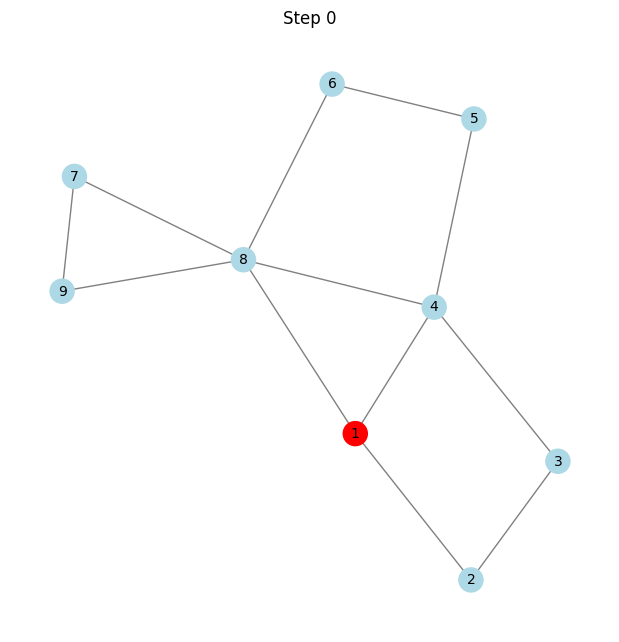

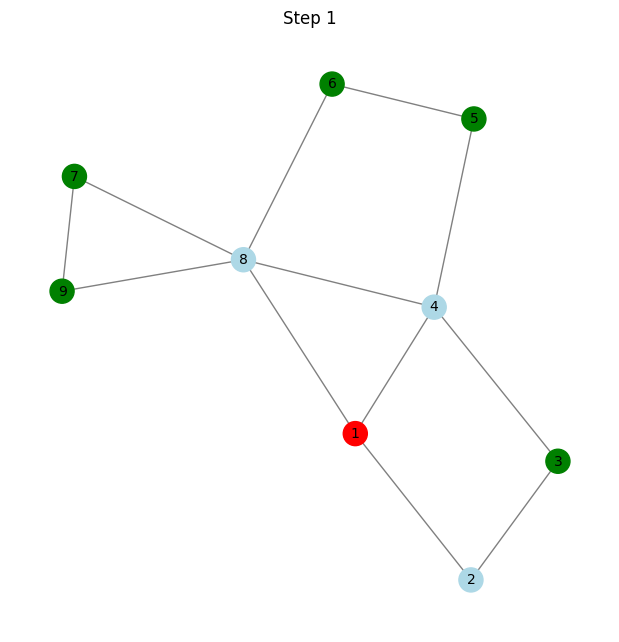

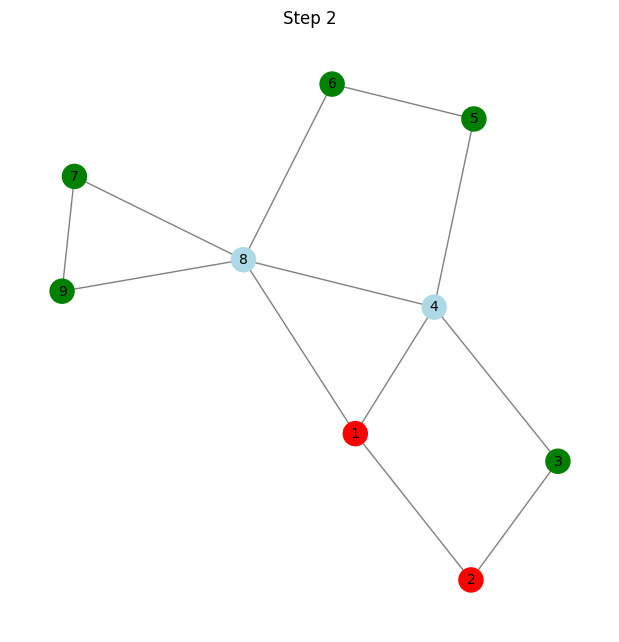

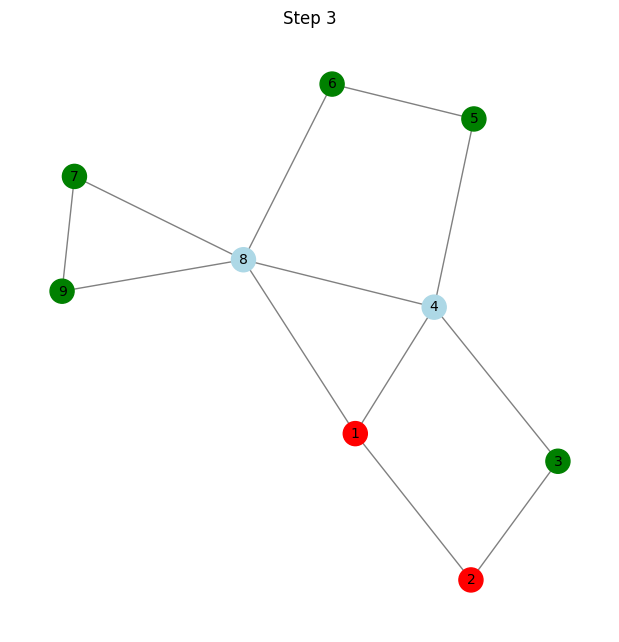

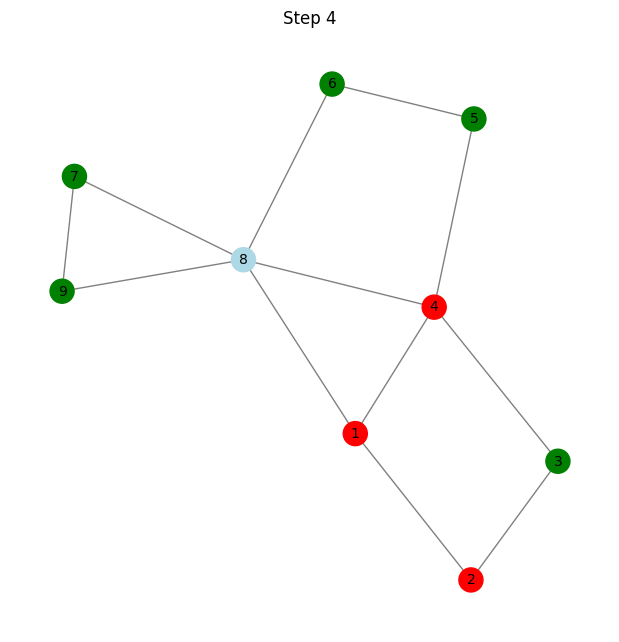

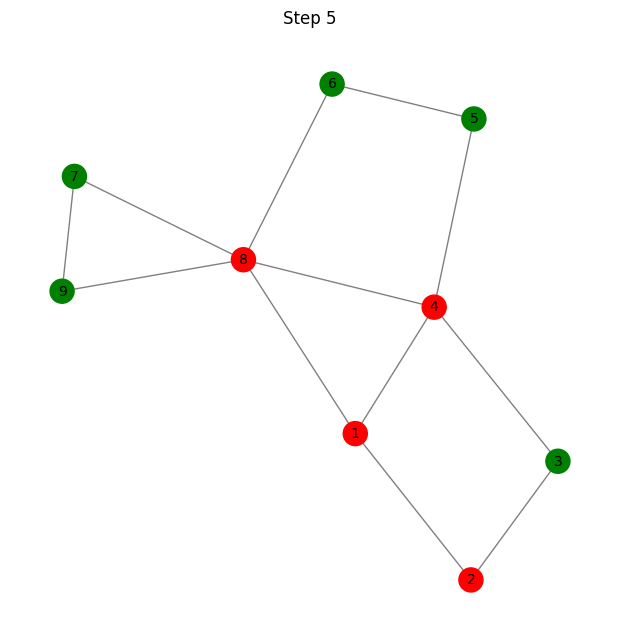

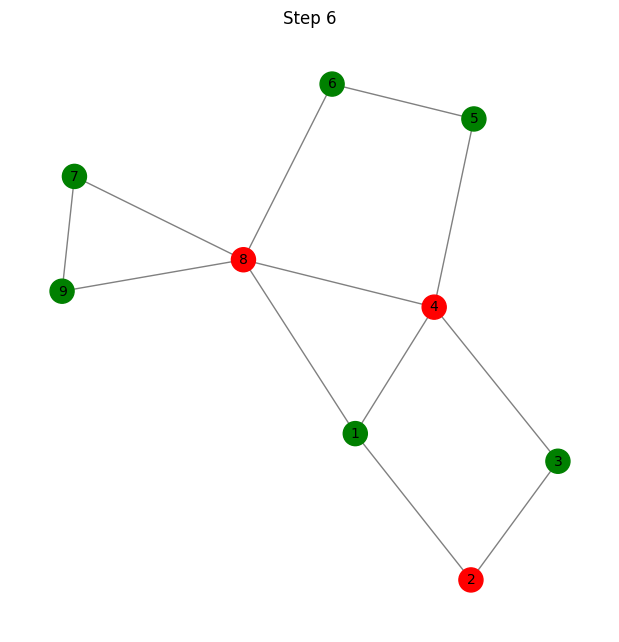

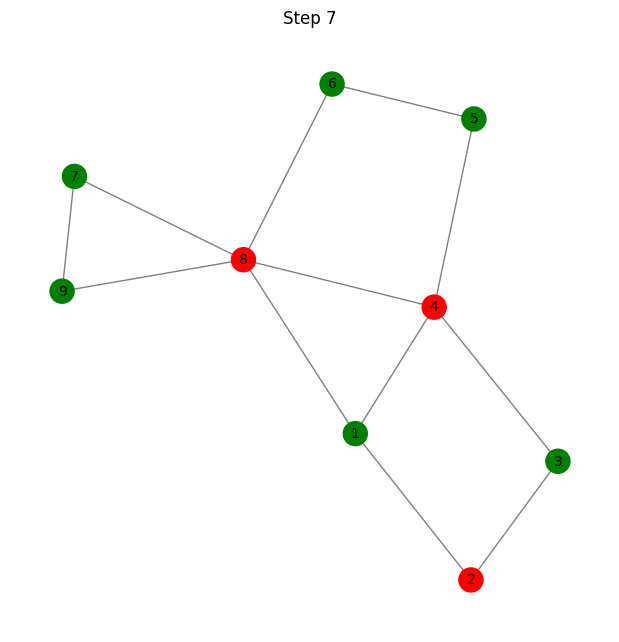

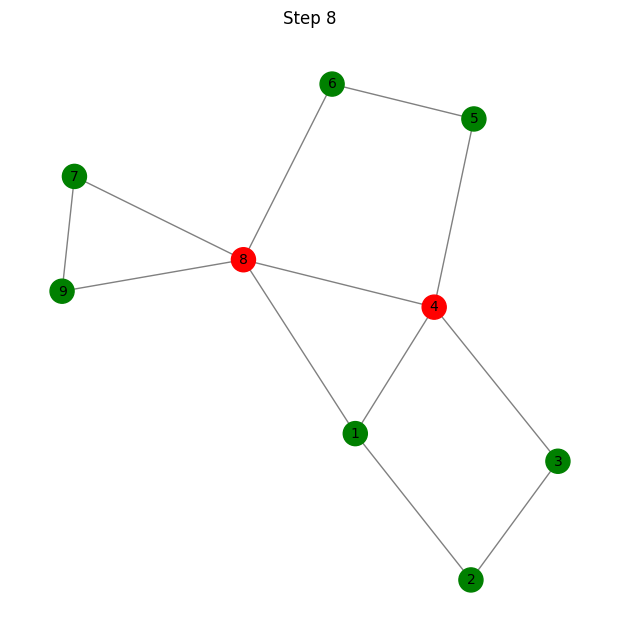

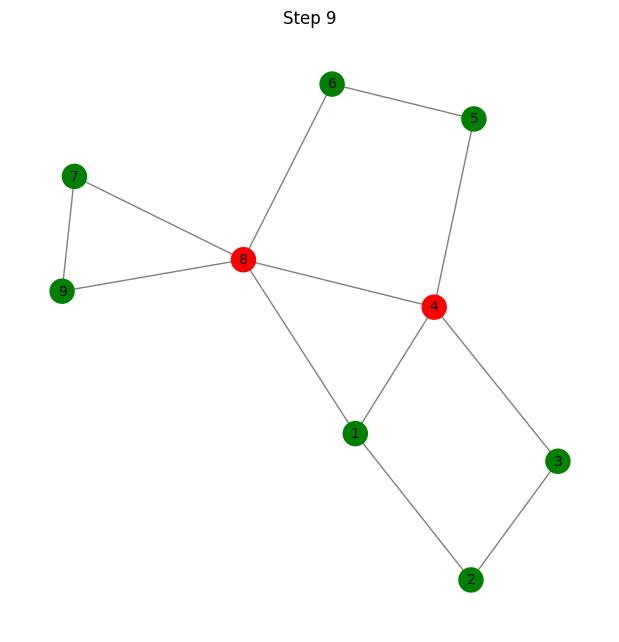

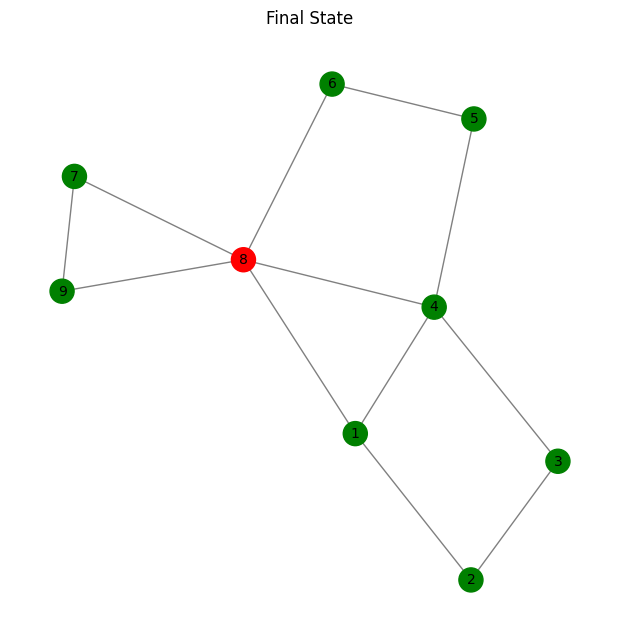

In [6]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a graph (example)
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 4), (1, 8), (2, 3), (3, 4), (4, 5), (4, 8), (5, 6), (6, 8), (7, 8), (7, 9), (8, 9)])

# Parameters for the SIR model
infection_rate = 0.3  # Beta (probability of infection transmission)
recovery_rate = 0.1   # Gamma (probability of recovery)

# Initial state of nodes: all susceptible
status = {node: 'S' for node in G.nodes()}

# Start by infecting one node (e.g., node 1)
initial_infecteds = [1]
for node in initial_infecteds:
    status[node] = 'I'  # Infect the initial node

# Recovery tracker: how long each node has been infected
recovered = {node: 0 for node in G.nodes()}

def get_recovered
# Function to plot the graph at a given time step
def plot_graph(G, status, title, pos):
    color_map = []
    for node in G:
        if status[node] == 'S':
            color_map.append('lightblue')  # Susceptible
        elif status[node] == 'I':
            color_map.append('red')  # Infected
        elif status[node] == 'R':
            color_map.append('green')  # Recovered
    
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, node_color=color_map, with_labels=True, edge_color='gray', font_size=10)
    plt.title(title)
    plt.show()

# Function to update the infection and recovery process at each time step
def update_infection(G, status, recovery_timer, infection_rate, recovery_rate, recovery_time):
    new_status = status.copy()

    for node in G.nodes():
        if status[node] == 'I':  # If the node is infected
            # Check if it's time to recover
            if recovery_timer[node] >= recovery_time:
                new_status[node] = 'R'  # Recover
            else:
                recovery_timer[node] += 1  # Increment infection time
                
                # Infect susceptible neighbors with a certain probability
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_rate:
                        new_status[neighbor] = 'I'  # Neighbor gets infected

        elif status[node] == 'S':  # If the node is susceptible
            infected_neighbors = [n for n in G.neighbors(node) if status[n] == 'I']
            
            # If no infected neighbors, node recovers (becomes unsusceptible)
            if not infected_neighbors:
                new_status[node] = 'R'  # Recovered (unsusceptible)
    
    return new_status


# Position the graph layout
pos = nx.spring_layout(G)

# Run the SIR simulation for a number of steps
num_steps = 10
for step in range(num_steps):
    # Plot the current state of the graph
    plot_graph(G, status, f"Step {step}", pos)
    
    # Update the infection and recovery process
    status = update_infection(G, status, recovery_timer, infection_rate, recovery_rate, recovery_time)

# Plot the final state of the graph
plot_graph(G, status, f"Final State", pos)
